In [1]:
#instal libraries

#pip install sentence-transformers
#pip install umap-learn
#pip install hdbscan

In [1]:
#import libraries

import re
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
#reads in california constitution

#i need to clean the data more

with open('/Users/jianingcai/Documents/GitHub/DS4002-Project1/DATA/2016.txt', 'r') as f:
    data = f.read()

In [3]:
data

'Scripts.com \nBatman v Superman: Dawn of Justice \nBy Chris Terrio \nPage 1/43\nThere was a time above... \nA time before... \nThere were perfect things. \nDiamond absolutes. \nBut things fall... \nThings on Earth, \nand what falls... \n- ...is fallen. \n- Master Wayne. Bruce! \nBruce, are you alright. \nMartha... \nIn the dream \nthey took me to the light. \nA beautiful lie. \n- Jack. \n- Bruce. \nJack, listen to me. \nI want you to get everyone \nout of the building. Right now. You understand? \nLet\'s go. \nCome on, start moving now, people. Let\'s go. \nThe boss wants us out \nof the building. \nSo, let\'s make it happen. \nJack. \nJack! \nWe\'re sorry. \nAll services are busy now. \nWill you please try \nyou call again later. \nHeaven god. \nCreator of heaven and earth. \nHave mercy on my soul. \nJACK!!! \nMr. Wayne! \nMr. Wayne! \nI can\'t feel my legs. \n- I can\'t feel my legs. \n- We need help over here! \nHelp me. \nI can\'t feel my legs. \nYou\'re going to be okay, \nPage 2

In [4]:
#data cleaning

def clean(text):
    pattern = r"\b(?=[MDCLXVIΙ])M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})([IΙ]X|[IΙ]V|V?[IΙ]{0,3})\b\.?"
    return re.sub(pattern, ' ', text)

data = clean(data)
data = data.replace('SEC.', ' ')

In [5]:
#Removes all numbers
data = ''.join([i for i in data if not i.isdigit()])

In [6]:
data = data.split("\n")    

In [7]:
data = [item for item in data if item != '']

In [8]:
data

['Scripts.com ',
 'Batman v Superman:  Dawn of Justice ',
 'By  Chris Terrio ',
 'Page /',
 'There was a time above... ',
 'A time before... ',
 'There were perfect things. ',
 ' Diamond absolutes. ',
 'But things fall... ',
 'Things on Earth, ',
 'and what falls... ',
 '- ...is fallen. ',
 '-  Master Wayne. Bruce! ',
 'Bruce, are you alright. ',
 ' Martha... ',
 ' In the dream ',
 'they took me to the light. ',
 'A beautiful lie. ',
 '- Jack. ',
 '- Bruce. ',
 'Jack, listen to me. ',
 '  want you to get everyone ',
 'out of the building. Right now. You understand? ',
 " Let's go. ",
 " Come on, start moving now, people.  Let's go. ",
 'The boss wants us out ',
 'of the building. ',
 "So, let's make it happen. ",
 'Jack. ',
 'Jack! ',
 "We're sorry. ",
 'All services are busy now. ',
 'Will you please try ',
 'you call again later. ',
 'Heaven god. ',
 ' Creator of heaven and earth. ',
 'Have mercy on my soul. ',
 'JACK!!! ',
 ' Mr. Wayne! ',
 ' Mr. Wayne! ',
 "  can't feel my legs. ",

In [9]:
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(data, show_progress_bar = True)

Batches:   0%|          | 0/519 [00:00<?, ?it/s]

In [10]:
umap_embeddings = umap.UMAP(n_neighbors=15, n_components=2, metric='cosine').fit_transform(embeddings)

In [11]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean', 
                          cluster_selection_method='eom').fit(umap_embeddings)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
To disable this warning, you can either:
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if pos

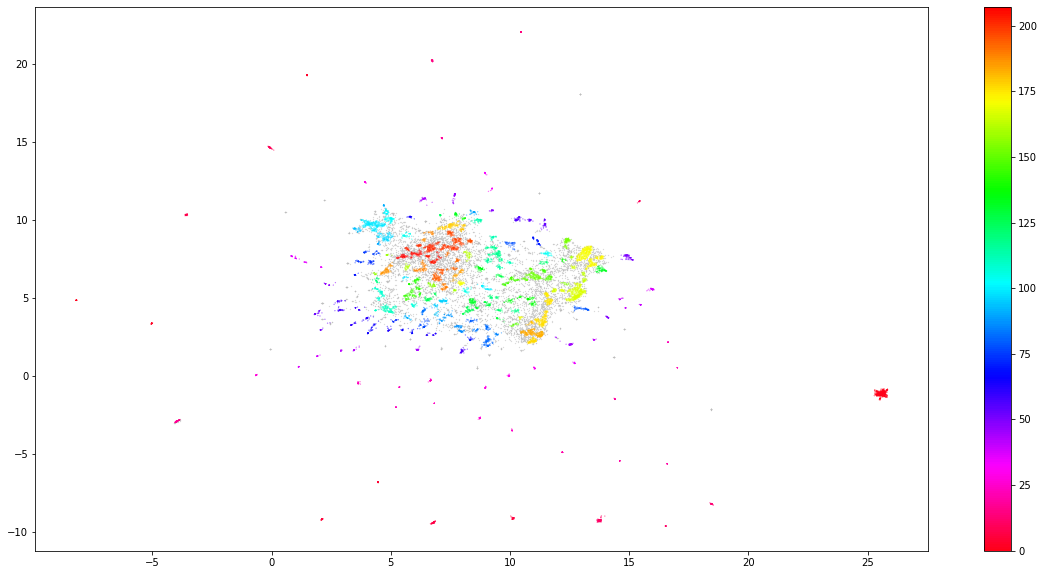

In [12]:
#umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_embeddings, columns=['x','y'])
result['labels'] = cluster.labels_

fig, ax = plt.subplots(figsize=(20,10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]

plt.scatter(outliers.x, outliers.y, color = '#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

In [13]:
docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [14]:
docs_per_topic

,Topic,Doc
0,-1,By Chris Terrio A time before... There were...
1,0,Page / Page / Page / Page / Page / Page / Page...
2,1,AJAX : AJAX : AJAX : AJAX : AJAX : AJAX :...
3,2,would be an uzi. CHIRRUT ÎMWE: CHIRRUT ÎMW...
4,3,BAZE MALBUS: BAZE MALBUS: BAZE MALBUS: B...
...,...,...
204,203,- He returns them. Advising. He's found us. ...
205,204,Genesis Chamber ready Clark had this sent h...
206,205,"Oh, and apparently, he's brought a guest. We k..."
207,206,this happened. You belong in here. in our ow...


In [15]:
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count

In [16]:
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

In [17]:
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

,Topic,Size
0,-1,6226
1,0,420
168,167,413
172,171,308
100,99,271
177,176,197
12,11,149
184,183,147
202,201,138
179,178,127


In [18]:
len(top_n_words)

170

In [18]:
index = [0,167,171,96,176,11,183]

In [19]:
for i in index:
    print("Topic #", i-1)
    print(top_n_words[i][:7])
    print()

Topic # -1
[('page', 3.499402890849593), ('written', 0.023079847170174243), ('pencil', 0.02047031679329037), ('forearm', 0.0), ('ford', 0.0), ('forces', 0.0), ('forced', 0.0)]

Topic # 166
[('bad', 0.20701782494808385), ('crazy', 0.10637132717651822), ('wrong', 0.08482758375895087), ('hard', 0.06882850582010001), ('afraid', 0.0672761099608545), ('worst', 0.05937161614133581), ('weird', 0.051282325025940836)]

Topic # 170
[('don', 0.42923101878466924), ('ain', 0.11469702874226861), ('care', 0.08244918026325795), ('won', 0.06706329837019048), ('make', 0.05800221812942144), ('ask', 0.05678377209293559), ('shit', 0.049232255539736425)]

Topic # 95
[('dad', 0.8124599961781032), ('father', 0.47790364053407103), ('son', 0.4696937302230716), ('daddy', 0.2953518106261434), ('brother', 0.2929632888820962), ('plants', 0.15438031537822014), ('rocks', 0.1464816444410481)]

Topic # 175
[('people', 0.040265502585277786), ('bunnifer', 0.0393933684122039), ('krennic', 0.035884718565569115), ('ve', 0.03